# Drivers

## Setup

In [1]:
import sys
print(sys.executable)
import lightlab.util.io as io
from lightlab.util.sweep import NdSweeper
import time
import datetime
import numpy
import matplotlib.pyplot as plt


C:\ProgramData\Anaconda3\python.exe


#### Laser setup

In [3]:
from lightlab.equipment.lab_instruments import hp816x_instr as hp816x_instr
channel1 = hp816x_instr.hp816x()
channel1.connect('GPIB0::30::INSTR', reset=0, forceTrans=1)
print(channel1.query('*IDN?'))

a
<class 'bytes'> b'HEWLETT-PACKARD,HP8164A,DE38700815,V5.25(72630)\n'
The mainframe is: HP8164A
Connected to the laser
HEWLETT-PACKARD,HP8164A,DE38700815,V5.25(72630)


#### Sourcemeter setup

In [4]:
from lightlab.equipment.lab_instruments import Ke26XXA as Ke
Keithley = Ke.Ke26XXA()
Keithley.connect('GPIB0::29::INSTR')
print("connected")

connected


#### Dark current-voltage scan

Printing progress in tempfile C:\Users\Admin\progress-monitor\swp_prog2tf3vo70
Generic sweep in Voltage
Dim-0...
1/81...
2/81...
3/81...
4/81...
5/81...
6/81...
7/81...
8/81...
9/81...
10/81...
11/81...
12/81...
13/81...
14/81...
15/81...
16/81...
17/81...
18/81...
19/81...
20/81...
21/81...
22/81...
23/81...
24/81...
25/81...
26/81...
27/81...
28/81...
29/81...
30/81...
31/81...
32/81...
33/81...
34/81...
35/81...
36/81...
37/81...
38/81...
39/81...
40/81...
41/81...
42/81...
43/81...
44/81...
45/81...
46/81...
47/81...
48/81...
49/81...
50/81...
51/81...
52/81...
53/81...
54/81...
55/81...
56/81...
57/81...
58/81...
59/81...
60/81...
61/81...
62/81...
63/81...
64/81...
65/81...
66/81...
67/81...
68/81...
69/81...
70/81...
71/81...
72/81...
73/81...
74/81...
75/81...
76/81...
77/81...
78/81...
79/81...
80/81...
81/81...
Sweep completed!
[1.07884e-06 4.18270e-05 8.24332e-05 1.22901e-04 1.63401e-04 2.03815e-04
 2.44368e-04 2.84784e-04 3.25217e-04 3.65416e-04 4.05692e-04 4.45960e-04
 4.8

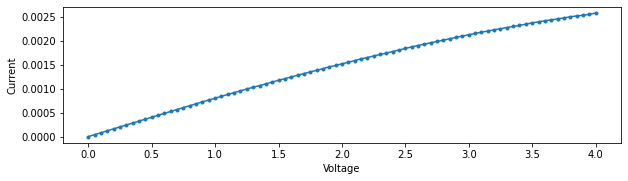

In [26]:
def I_dark(vi,vf,steps,filename):
    '''
    vi=initial voltage in V
    vf=final voltage in V
    steps=steps inbetween vi and vf
    filename=name of file to save data
    '''
    domain=numpy.arange(vi,vf+steps,steps)#sets up range of voltage values
    channel1.setTLSState('off')#turns laser off
    Keithley.setCurrentMeasurementRange(10e-3,chan='a')
    Keithley.setCurrentLimit(10e-3,chan='a') 
    Keithley.outputenable(True)#enables keithley to send voltage
    darksweep = NdSweeper()#lightlab sweeping module
    darksweep.addActuation('Voltage', lambda v: Keithley.setVoltage(v,chan='a'),domain)#tells lightlab sweeper package to sweep voltage across domain 
    darksweep.addMeasurement('Current', lambda: Keithley.getCurrent(chan='a'))#tells lightlab sweeper package to measure current
    darksweep.gather(3)#tells sweeper package to sweep after waiting 3 seconds
    darksweep.saveObj(filename)#save file
    Keithley.setVoltage(0)#sets voltage back to 0
    darksweep.plot()#plots
I_dark(0,4,50e-3,'test_modular_dark')

#### Light current-voltage scan

Printing progress in tempfile C:\Users\Admin\progress-monitor\swp_progxe3cnw0k
Generic sweep in Voltage
Dim-0...
1/81...
2/81...
3/81...
4/81...
5/81...
6/81...
7/81...
8/81...
9/81...
10/81...
11/81...
12/81...
13/81...
14/81...
15/81...
16/81...
17/81...
18/81...
19/81...
20/81...
21/81...
22/81...
23/81...
24/81...
25/81...
26/81...
27/81...
28/81...
29/81...
30/81...
31/81...
32/81...
33/81...
34/81...
35/81...
36/81...
37/81...
38/81...
39/81...
40/81...
41/81...
42/81...
43/81...
44/81...
45/81...
46/81...
47/81...
48/81...
49/81...
50/81...
51/81...
52/81...
53/81...
54/81...
55/81...
56/81...
57/81...
58/81...
59/81...
60/81...
61/81...
62/81...
63/81...
64/81...
65/81...
66/81...
67/81...
68/81...
69/81...
70/81...
71/81...
72/81...
73/81...
74/81...
75/81...
76/81...
77/81...
78/81...
79/81...
80/81...
81/81...
Sweep completed!
[1.07169e-06 4.26495e-05 8.40521e-05 1.25296e-04 1.66792e-04 2.08058e-04
 2.49244e-04 2.90425e-04 3.31811e-04 3.72975e-04 4.13908e-04 4.55041e-04
 4.9

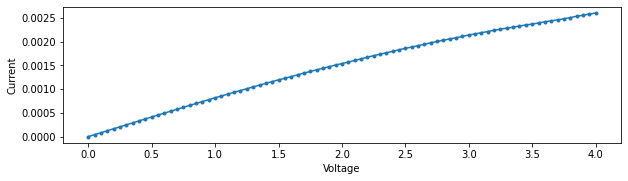

In [27]:
def I_light(vi,vf,steps,filename,wave=.00000155,power=0):
    '''
    vi=initial voltage in V
    vf=final voltage in V
    steps=steps inbetween vi and vf
    filename=name of file to save data
    wave=wavelength in m
    power=optical power in dbm
    '''
    domain=numpy.arange(vi,vf+steps,steps)
    Keithley.setCurrentMeasurementRange(10e-3,chan='a')
    Keithley.setCurrentLimit(10e-3,chan='a') 
    Keithley.outputenable(True)
    channel1.setWavelength(wave)
    channel1.setOutputPower(power)
    channel1.setTLSState('on')
    lightsweep = NdSweeper()
    lightsweep.addActuation('Voltage', lambda v: Keithley.setVoltage(v,chan='a'),domain)
    lightsweep.addMeasurement('Current', lambda: Keithley.getCurrent(chan='a'))
    lightsweep.gather(3)
    lightsweep.saveObj(filename)
    Keithley.setVoltage(0)
    lightsweep.plot()
I_light(0,4,50e-3,'test_light_modular')

#### Photocurrent scan

Printing progress in tempfile C:\Users\Admin\progress-monitor\swp_progg8v3pedk
Generic sweep in Voltage
Dim-0...
1/81...
2/81...
3/81...
4/81...
5/81...
6/81...
7/81...
8/81...
9/81...
10/81...
11/81...
12/81...
13/81...
14/81...
15/81...
16/81...
17/81...
18/81...
19/81...
20/81...
21/81...
22/81...
23/81...
24/81...
25/81...
26/81...
27/81...
28/81...
29/81...
30/81...
31/81...
32/81...
33/81...
34/81...
35/81...
36/81...
37/81...
38/81...
39/81...
40/81...
41/81...
42/81...
43/81...
44/81...
45/81...
46/81...
47/81...
48/81...
49/81...
50/81...
51/81...
52/81...
53/81...
54/81...
55/81...
56/81...
57/81...
58/81...
59/81...
60/81...
61/81...
62/81...
63/81...
64/81...
65/81...
66/81...
67/81...
68/81...
69/81...
70/81...
71/81...
72/81...
73/81...
74/81...
75/81...
76/81...
77/81...
78/81...
79/81...
80/81...
81/81...
Sweep completed!
OrderedDict([('Voltage', array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9

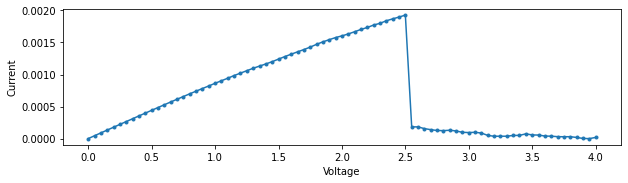

In [28]:
def I_ph(vi,vf,steps,filename,wave=.000001555,power=6):
    '''
    ****NOTWORKING***
    vi=initial voltage in V
    vf=final voltage in V
    steps=steps inbetween vi and vf
    filename=name of file to save data
    wave=wavelength in m
    power=optical power in dbm
    '''
    domain=numpy.arange(vi,vf+steps,steps)
    Keithley.setVoltage(0)
    Keithley.setCurrentMeasurementRange(10e-3,chan='a')
    Keithley.setCurrentLimit(10e-3,chan='a') 
    Keithley.outputenable(True)
    channel1.setTLSState('off')
    channel1.setWavelength(wave)
    channel1.setOutputPower(power)
    darksweep = NdSweeper()
    darksweep.addActuation('Voltage', lambda v: Keithley.setVoltage(v,chan='a'),domain)
    darksweep.addMeasurement('Current', lambda: Keithley.getCurrent(chan='a'))
    darksweep.gather(3)
    storage=darksweep.data
    Keithley.setVoltage(0)
    channel1.setTLSState('on')
    lightsweep=NdSweeper()
    lightsweep.addActuation('Voltage', lambda v: Keithley.setVoltage(v,chan='a'),domain)
    lightsweep.addMeasurement('Current', lambda: Keithley.getCurrent(chan='a'))
    lightsweep.gather(3)
    stor2=lightsweep.data
    for i in range(len(storage["Current"])):
        darksweep.data["Current"][i]=lightsweep.data["Current"][i]-darksweep.data["Current"][i]
    Keithley.setVoltage(0)
    darksweep.saveObj(filename)
    darksweep.plot()
I_ph(0,4,50e-3,'test_modular_photocurrent')
    

#### Optical Power and Voltage

Printing progress in tempfile C:\Users\Admin\progress-monitor\swp_progm9tqwk5d
Generic sweep in Voltage
Dim-0...
1/600...
2/600...
3/600...
4/600...
5/600...
6/600...
7/600...
8/600...
9/600...
10/600...
11/600...
12/600...
13/600...
14/600...
15/600...
16/600...
17/600...
18/600...
19/600...
20/600...
21/600...
22/600...
23/600...
24/600...
25/600...
26/600...
27/600...
28/600...
29/600...
30/600...
31/600...
32/600...
33/600...
34/600...
35/600...
36/600...
37/600...
38/600...
39/600...
40/600...
41/600...
42/600...
43/600...
44/600...
45/600...
46/600...
47/600...
48/600...
49/600...
50/600...
51/600...
52/600...
53/600...
54/600...
55/600...
56/600...
57/600...
58/600...
59/600...
60/600...
61/600...
62/600...
63/600...
64/600...
65/600...
66/600...
67/600...
68/600...
69/600...
70/600...
71/600...
72/600...
73/600...
74/600...
75/600...
76/600...
77/600...
78/600...
79/600...
80/600...
81/600...
82/600...
83/600...
84/600...
85/600...
86/600...
87/600...
88/600...
89/600...
90/600

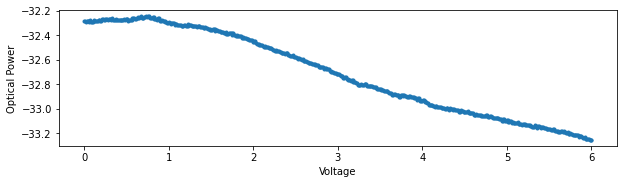

In [12]:
def P_v(vi,vf,steps,filename,wave=.00000155,power=0,laserchannel=1):
    '''
    vi=initial voltage in V
    vf=final voltage in V
    steps=steps inbetween vi and vf
    filename=name of file to save data
    wave=wavelength in m
    power=optical power in dbm
    '''
    domain=numpy.linspace(vi,vf,steps)
    Keithley.setCurrentMeasurementRange(10e-3,chan='a')
    Keithley.setCurrentLimit(10e-3,chan='a') 
    Keithley.outputenable(True)
    testsweep = NdSweeper()
    channel1.setWavelength(wave)
    channel1.setOutputPower(power)
    channel1.setTLSState('on')
    testsweep.addActuation('Voltage', lambda v: Keithley.setVoltage(v),domain)
    testsweep.addMeasurement('Optical Power', lambda: channel1.readPWM(0,laserchannel))
    testsweep.gather(3)
    testsweep.saveObj(filename)
    Keithley.setVoltage(0)
    testsweep.plot()
P_v(0,6,600,'test_modular_pv')

#### Optical Power and Wavelength

In [ ]:
def P_w(wi,wf,steps,filename,wave=.00000155,power=0):
    '''
    wi=initial wavelength in m
    wf=final wavelength in m
    steps=number of steps inbetween wi and wf
    filename=name of file to save data
    wave=wavelength in m
    power=optical power in dbm
    '''
    domain=numpy.linspace(wi,wf,steps)
    Keithley.setCurrentMeasurementRange(10e-3,chan='a')
    Keithley.setCurrentLimit(10e-3,chan='a') 
    channel1.setWavelength(wave)
    channel1.setOutputPower(power)
    channel1.setTLSState('on')
    testsweep = NdSweeper()
    testsweep.addActuation('Frequency', lambda f: channel1.setWavelength(f),domain)
    testsweep.addMeasurement('Optical Power', lambda: channel1.readPWM(0,1))
    testsweep.gather(3)
    testsweep.saveObj(filename)
    testsweep.plot()
P_w(.00000148,.00000158,100,'test_modular_pw')

Printing progress in tempfile C:\Users\Admin\progress-monitor\swp_progjsx77rr0
Generic sweep in Frequency
Dim-0...
1/100...
2/100...
3/100...
4/100...
5/100...
6/100...
7/100...
8/100...
9/100...
10/100...
11/100...
12/100...
13/100...
14/100...
15/100...
16/100...
17/100...
18/100...
19/100...
20/100...
21/100...
22/100...
23/100...
24/100...
25/100...
26/100...
27/100...
28/100...
29/100...
30/100...
31/100...
32/100...
33/100...
34/100...
35/100...
36/100...
37/100...
38/100...
39/100...
40/100...
